# Data Science I - Lab 4 - pd.merge

**Author:** Pratik Mistry

**Date:** 30 November 2020

**GitHub Link:** https://github.com/pratikmistry96/Data-Science-I-Labs/tree/master/Lab%204

## Introduction:

In this lab, we will get familiar using the Python programming language and the different packages to manipulate and process data. More specifically, we will gain an understanding of how to work with Pandas data frames and use functions like pd.merge to combine multiple datasets.

## Load Packages


In [21]:
## Import packages/libraries to process and manipulate data
import pandas as pd # Load pandas
import matplotlib.pyplot as plt # Load matplotlib
import seaborn as sns # Load seaborns
import numpy as np # Load numpy

## Questions: 

### 1) Read in the file 'listings' that contains the listings for the Boston AirBnBs. How many entries are in the file? How many unique identifiers are there for AirBnB listings?

In [22]:
listings = pd.read_csv('data/listings.csv') # Read listings csv as a pandas data frame
print('Number of Entries: {}'.format(listings.shape[0])) # Pull the number of rows as number of entries
print('Number of Unique Listings {}'.format(listings.nunique()['id'])) # # Pull number of unique listing IDs

Number of Entries: 6264
Number of Unique Listings 6264


**Answer:** 

Number of Entries: 6264

Number of Unique Listings 6264

### 2) Read in the 'reviews' file that contains the date of reviews for the Boston AirBnB listings. How many entries are in the file? How many unique identifiers are there for AirBnB listings?

In [23]:
reviews = pd.read_csv('data/reviews.csv') # Read reviews csv as pandas data frame
print('Number of Entries: {}'.format(reviews.shape[0])) # Pull number of rows as number of entries
print('Number of Unique Listings {}'.format(reviews.nunique()['listing_id'])) # Pull number of unique listing IDs

Number of Entries: 225880
Number of Unique Listings 5088


**Answer:** 

Number of Entries: 225880

Number of Unique Listings 5088

### 3) Merge the review and listing files. Do a merge using the function 'pd.merge' so that all of the entries from listing are in the merged data frame and have an NaN if there is no corresponding entry in reviews. How many rows do you now have? How many unique AirBnB ids do you have? How many rows were filled in with NaN?

In [24]:
# Left merge the two data sets 
left_merged_data = pd.merge(listings, reviews, left_on = "id", right_on = "listing_id", how = 'left') # Merge listings and review using the 'left' method

In [25]:
print('Number of Entries: {}'.format(left_merged_data.shape[0])) # Print the number of rows - number of entries
print('Number of Unique Listings: {}'.format(left_merged_data.nunique()['id'])) # Print the unique number of listings
print('Number of Rows with NaNs: {}'.format(left_merged_data['listing_id'].isnull().sum())) # Print the number of rows with NaNs

Number of Entries: 227056
Number of Unique Listings: 6264
Number of Rows with NaNs: 1176


**Answer:** 

Number of Entries: 227056

Number of Unique Listings: 6264

Number of Rows with NaNs: 1176

### 4) Merge the review and listing files again using 'pd.merge'. This time do a merge so that all of the entries from reviews are in the dataframe (and therefore any entries from listings that do not have a review are dropped). How many rows do you now have? How many unique AirBnB ids do you have?

In [26]:
inner_merged_data = pd.merge(listings, reviews, left_on = "id", right_on = "listing_id", how = 'inner') # Merge listings and reviews using the 'inner' method

In [27]:
print('Number of Entries: {}'.format(inner_merged_data.shape[0])) # Print the number of rows - number of entries
print('Number of Unique Listings: {}'.format(inner_merged_data.nunique()['id'])) # Print unique number of listings

Number of Entries: 225880
Number of Unique Listings: 5088


**Answer:**

Number of Entries: 225880

Number of Unique Listings: 5088

### 5) Accoring to AirBnB superhosts 'are experienced hosts who provide a shining example for other hosts, and extraordinary experiences for their guests'. How many unique AirBnBs are hosted by a 'superhost' in Boston? How many superhosts are there in Boston? How many super hosts do not have any reviews in the 'reviews' dataset? What is the median number of reviews that a superhost has in the 'reviews' dataset?

In [28]:
listing_superhost = listings[listings['host_is_superhost'].isin(['t'])].nunique()['id'] # Pull the number of unique listing ids for superhosts
n_superhosts = listings[listings['host_is_superhost'].isin(['t'])].nunique()['host_id'] # Print total number of superhosts

superhost_data = inner_merged_data[inner_merged_data['host_is_superhost'].isin(['t'])] # Pull superhost data from data with reviews
non_superhost_data = inner_merged_data[inner_merged_data['host_is_superhost'].isin(['f'])] # Pull non-superhost data with reviews

reviews_n_superhosts = superhost_data.nunique()['host_id'] # Number of superhosts with reviews

In [29]:
print('Number of Unique AirBnBs hosted by Superhost: {}'.format(listing_superhost)) # Print number of unique listings hosted by superhosts
print('Number of Superhost in Boston: {}'.format(n_superhosts)) # Print the number of superhosts in boston
print('There are {} superhosts who do not have reviews'.format(n_superhosts - reviews_n_superhosts)) # Print the number of superhosts who don't have reviews
print('Median Number of Reviews for Superhost: {}'.format(listings[listings['host_is_superhost'].isin(['t'])]['number_of_reviews'].median())) # Print the median number of reviews for a superhost

Number of Unique AirBnBs hosted by Superhost: 1448
Number of Superhost in Boston: 757
There are 6 superhosts who do not have reviews
Median Number of Reviews for Superhost: 41.0


**Answer:**

Number of Unique AirBnBs hosted by Superhost: 1448

Number of Superhost in Boston: 757

There are 6 superhosts who do not have reviews

Median Number of Reviews for Superhost: 41.0

### 6) Make boxplots to compare the number of reviews of superhosts to non-superhosts. Hint: the boxplots may look better if you log the counts! Add 1 to the number of counts so that you can log values of 0.

Text(0.5, 1.0, 'Number of Reviews by Host Status')

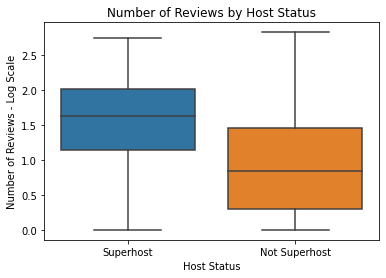

In [30]:
listings['number_of_reviews'] = np.log10(listings['number_of_reviews'] + 1) # Add 1 to number of reviews in listing data frame and take the log of those values
fig = sns.boxplot(x = 'host_is_superhost', y = 'number_of_reviews', data = listings) # Create a boxplot for the number of reviews
fig.set_xticklabels(('Superhost','Not Superhost')) # Label the x ticks
fig.set_xlabel('Host Status') # Label x axis
fig.set_ylabel('Number of Reviews - Log Scale') # Label the y axis
fig.set_title('Number of Reviews by Host Status') # Title the figure